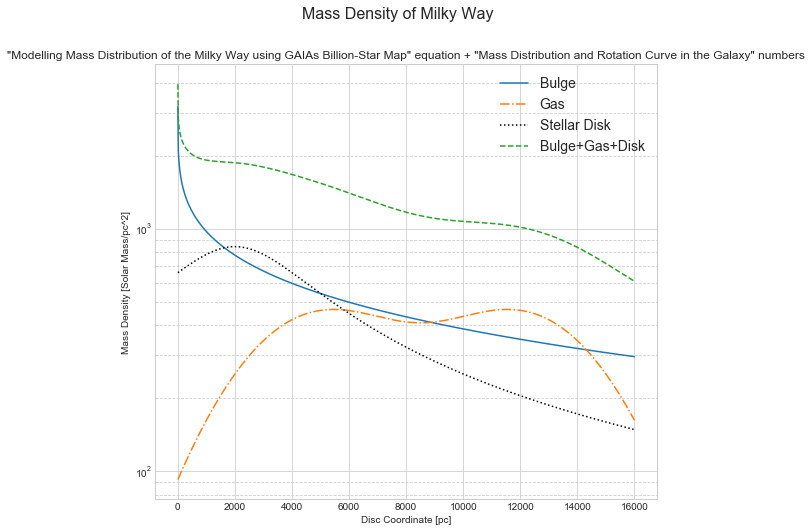

In [2]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')
              
 #parameters for graphs
r_0 = 500                                           #bulge/characteristic radius of bulge (in pc)
sig_b = 3.2e3                                       #bulge/central mass density (solar masses per pc^2)
sig_g1 = 4.4e2                                      #gas/peak surface density (solar masses per pc^2)
sig_g2 = 4.4e2                                      #gas/peak surface density (solar masses per pc^2)
r_g1 = 5.0e3                                        #gas/location 1 (in pc)
r_g2 = 12.0e3                                       #gas/location 2 (in pc)
w_g1 = 4.0e3                                        #gas/gaussian width (in pc)
w_g2 = 4.0e3                                        #gas/gaussian width (in pc)
r_b = 2.0e3                                         #disk/bulge radius (in pc)
sig_s = 8.44e2                                      #disk/max surface density (solar masses per pc^2)
l_c = 2.5e3                                         #disk/characteristic lenght (in pc)

 #adjusting the plot
fig = plt.figure(figsize=(9.0,8.0))                 #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

ax.set_yscale('log')
x = np.linspace(0, 16000, 1000)                     #x from/to and line smoothness

 #functions
plt.plot(x, sig_b*np.exp(-np.power(x/r_0, (1/4))), linestyle='solid', label='Bulge')          
plt.plot(x, (sig_g1*np.exp(-np.power(((x-r_g1)/w_g1), 2))) + (sig_g2*np.exp(-np.power(((x-r_g2)/w_g2), 2))), linestyle='dashdot', label='Gas')
plt.plot(x, (sig_s*l_c)/(np.sqrt(np.power((x-r_b), 2) + np.power(l_c, 2))), ':k', label='Stellar Disk');                          #dotted black
plt.plot(x, sig_b*np.exp(-np.power(x/r_0, (1/4)))+(sig_g1*np.exp(-np.power(((x-r_g1)/w_g1), 2))) + (sig_g2*np.exp(-np.power(((x-r_g2)/w_g2), 2)))+(sig_s*l_c)/(np.sqrt(np.power((x-r_b), 2) + np.power(l_c, 2))), '--', label='Bulge+Gas+Disk');  

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])
 #labeling plots
fig.suptitle('Mass Density of Milky Way', fontsize=16)
ax.set(title='"Modelling Mass Distribution of the Milky Way using GAIAs Billion-Star Map" equation + "Mass Distribution and Rotation Curve in the Galaxy" numbers')          #labeling axes
ax.set(xlabel='Disc Coordinate [pc]', ylabel='Mass Density [Solar Mass/pc^2]');

plt.legend(fontsize=14);                                      #adding legend

In [9]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import quad
              
 #parameters 
r_0 = 500                                           #bulge/characteristic radius of bulge (in pc)
n = 4
sig_b = 3.2e3                                       #bulge/central mass density (solar masses per pc^2)
sig_g1 = 4.4e2                                      #gas/peak surface density (solar masses per pc^2)
sig_g2 = 4.4e2                                      #gas/peak surface density (solar masses per pc^2)
r_g1 = 5.0e3                                        #gas/location 1 (in pc)
r_g2 = 12.0e3                                       #gas/location 2 (in pc)
w_g1 = 4.0e3                                        #gas/gaussian width (in pc)
w_g2 = 4.0e3                                        #gas/gaussian width (in pc)
r_b = 2.0e3                                         #disk/bulge radius (in pc)
sig_s = 8.44e2                                      #disk/max surface density (solar masses per pc^2)
l_c = 2.5e3                                         #disk/characteristic lenght (in pc)

 #integrate
m = 2
f = lambda x: (1/np.sqrt((x**2)-(m**2)))*(-1/(r_0)*n)*(np.exp(-np.power(x/r_0, (1/n))))*(np.power(x/r_0, ((1/n)-1)));
I = quad(f, m, np.inf)
print(I)


(-0.696793078576093, 8.670293372148308e-10)


In [14]:
g = lambda m: quad(f, m, np.inf)[0]
print(g(2))

-0.696793078576093


C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in sqrt


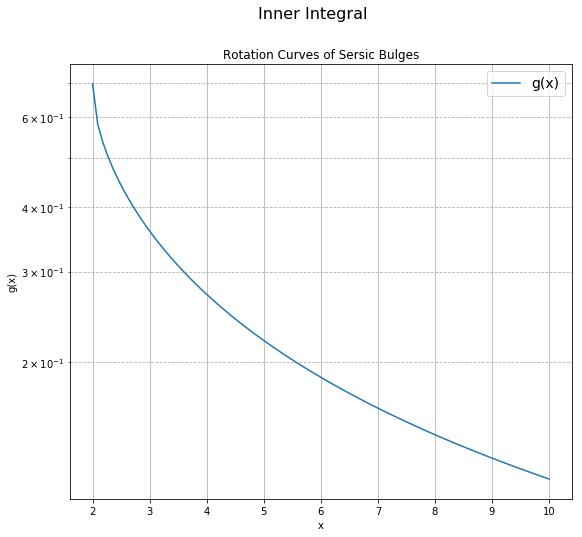

In [19]:
 #adjusting the plot
fig = plt.figure(figsize=(9.0,8.0))                 #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

ax.set_yscale('log')
x = np.linspace(1, 10, 100)                     #x from/to and line smoothness
gv = np.vectorize(g)

 #functions
plt.plot(x, -gv(x), linestyle='solid', label='g(x)')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])
 #labeling plots
fig.suptitle('Inner Integral', fontsize=16)
ax.set(title='Rotation Curves of Sersic Bulges')          #labeling axes
ax.set(xlabel='x', ylabel='g(x)');

plt.legend(fontsize=14);                                      #adding legend